# Basic imports

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import utils.toy.simple_generator as toy
import utils.hamiltonians.simple_hamiltonian as hamiltonian
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Detector

We are going to define a simple detector geometry of 3 parallel infinitely large modules, placed along the $z$-axis

In [4]:
N_MODULES = 3
#test bounds of LX and LY
LX = float("+inf")
LY = float("+inf")
Z_SPACING = 1.0

detector = toy.SimpleDetectorGeometry(
    module_id=list(range(N_MODULES)),
    lx=[LX]*N_MODULES,
    ly=[LY]*N_MODULES,
    z=[i+Z_SPACING for i in range(N_MODULES)])

detector

SimpleDetectorGeometry(module_id=[0, 1, 2], lx=[inf, inf, inf], ly=[inf, inf, inf], z=[1.0, 2.0, 3.0])

# Particle generator

Now we define a simple particle generator that will fire particles flying in straight lines through the our detector.

In [5]:
generator = toy.SimpleGenerator(
    detector_geometry=detector,
    theta_max=np.pi/6
)

Let's generate a simple event

In [6]:
N_PARTICLES = 8
event = generator.generate_event(N_PARTICLES)
print(event.hits)
print(event.tracks)
print(event.modules)

TypeError: MCInfo.__init__() missing 1 required positional argument: 'times'

Text(0.5, 0.92, 'Generated event\n3 modules\n8 tracks - 24 hits')

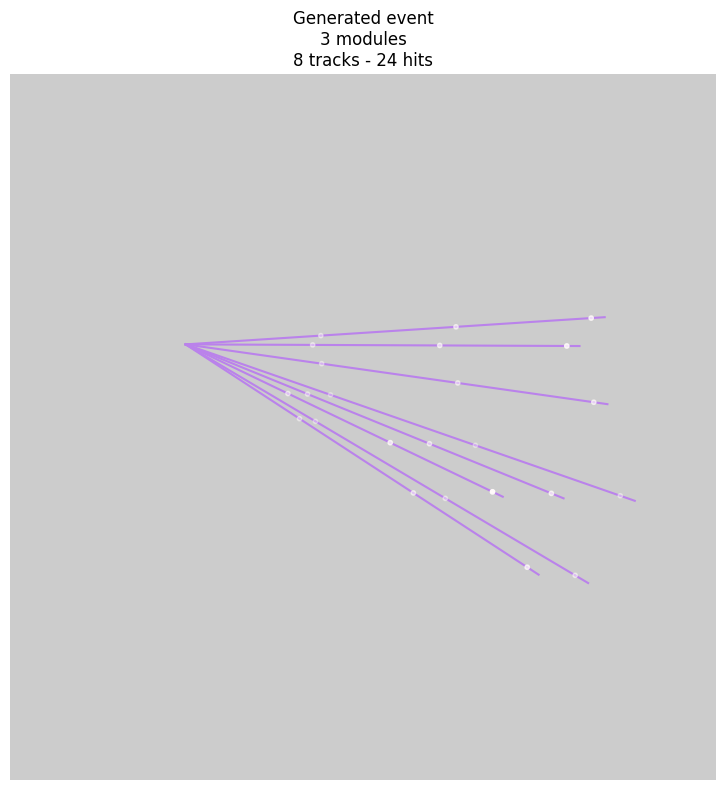

In [51]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = plt.axes(projection='3d')
event.display(ax, show_tracks = True, show_hits = True, show_modules = True, equal_axis = True, s_hits=10)
ax.view_init(vertical_axis='y')
fig.set_tight_layout(True)
ax.axis('off')
ax.set_title(f"Generated event\n{len(event.modules)} modules\n{len(event.tracks)} tracks - {len(event.hits)} hits")

# Hamiltonian initialization

Let's initialize the Hamiltonian.

In [52]:
ham = hamiltonian.SimpleHamiltonian(
    epsilon=1e-3,
    gamma=2.0,
    delta=1.0
)

In [53]:
import time
start = time.time()
ham.construct_hamiltonian(event=event)
print('time taken:', time.time() - start)

time taken: 0.013480901718139648


In [54]:
ham.construct_Z()

In [55]:
a = np.zeros((3, 3), float)
np.fill_diagonal(a, 5)
a

array([[5., 0., 0.],
       [0., 5., 0.],
       [0., 0., 5.]])

In [56]:
ham.A = ham.A
print(ham.A.todense())
print(ham.b)

[[3. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 3.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
eigenvalues = np.linalg.eigvals(ham.A.todense())
eigenvalues

array([4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 4., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [58]:
import numpy as np

# Given 8x8 matrix
target_matrix = np.array([
    [3., 0., 0., 0., -1., 0., 0., 0.],
    [0., 3., 0., 0., 0., 0., 0., 0.],
    [0., 0., 3., 0., 0., 0., 0., 0.],
    [0., 0., 0., 3., 0., 0., 0., -1.],
    [-1., 0., 0., 0., 3., 0., 0., 0.],
    [0., 0., 0., 0., 0., 3., 0., 0.],
    [0., 0., 0., 0., 0., 0., 3., 0.],
    [0., 0., 0., -1., 0., 0., 0., 3.]
])

# Extracting 4x4 and 2x2 matrices
matrix_4x4 = target_matrix[:4, :4]
matrix_2x2 = target_matrix[4:, 4:]

# Calculating the tensor product
tensor_product = np.kron(matrix_4x4, matrix_2x2)

# Check if the tensor product is equal to the original matrix
result = np.array_equal(tensor_product, target_matrix)

# Print the result
print(matrix_2x2)



[[3. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 3.]]


# Classical solver

Let's solve this event using a classical linear solver (the Conjugate Gradient Descent method)

In [59]:
classical_solution = ham.solve_classicaly()
classical_solution

array([0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.5       , 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.5       , 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.5       , 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.5       ,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.5       , 0.33333

Let's apply a threshold $T = 0.45$

In [60]:
T = .45

In [61]:
discretized_classical_solution = (classical_solution > T).astype(int)
discretized_classical_solution

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

# Convert the solutions into geometry

In [90]:
import pandas as pd
# HITS on each layer


hits_on_layer = {f'{int(z)}' : [h for h in event.hits if h.z == z] for z in set([h.z for h in event.hits])}
hits_per_layer = {f'{int(z)}' : len(hits_on_layer[z]) for z in hits_on_layer.keys()}

In [91]:
print(hits_per_layer)
print(hits_on_layer)

{'1': 8, '2': 8, '3': 8}
{'1': [Hit(hit_id=0, x=0.19635981477375292, y=0.49844850326640544, z=1.0, module_id=0, track_id=0), Hit(hit_id=3, x=-0.2900019424398101, y=-0.35195299033016614, z=1.0, module_id=0, track_id=1), Hit(hit_id=6, x=-0.5536482054045333, y=0.11082240197844757, z=1.0, module_id=0, track_id=2), Hit(hit_id=9, x=0.07446235715009111, y=-0.5698331265941671, z=1.0, module_id=0, track_id=3), Hit(hit_id=12, x=0.011083730081031145, y=0.46860249593450326, z=1.0, module_id=0, track_id=4), Hit(hit_id=15, x=-0.10620887143595192, y=-0.11974110593940919, z=1.0, module_id=0, track_id=5), Hit(hit_id=18, x=0.41760184514983056, y=-0.3920924973572009, z=1.0, module_id=0, track_id=6), Hit(hit_id=21, x=0.21641421676029932, y=0.11898464795432112, z=1.0, module_id=0, track_id=7)], '2': [Hit(hit_id=1, x=0.39271962954750583, y=0.9968970065328109, z=2.0, module_id=1, track_id=0), Hit(hit_id=4, x=-0.5800038848796202, y=-0.7039059806603323, z=2.0, module_id=1, track_id=1), Hit(hit_id=7, x=-1.10729

In [101]:
import numpy as np
def find_hit_pairs(events):
    hits_per_layer = {}
    for event in events:
        hits_on_layer = {f'{int(z)}': [h for h in event.hits if h.z == z] for z in set([h.z for h in event.hits])}
        hits_per_layer.update(hits_on_layer)

    layers = list(hits_per_layer.keys())
    H = list(hits_per_layer.values())

    P = np.zeros(len(layers))
    for i in range(1, len(layers)):
        count = 0
        for j in range(i):
            count += len(H[j]) * len(H[j + 1])
        P[i] = count

    S = discretized_classical_solution
    non_zero_indices = np.nonzero(S)[0]

    hit_pairs = []

    for eta in non_zero_indices:
        for j in range(1, P.shape[0]):
            if P[j] < eta <= P[j + 1]:
                tau = eta - P[j]
                alpha, beta = divmod(tau, len(H[j + 1]))
                hit_pairs.append((hits_on_layer[f'{int(j)}'][int(alpha)], hits_on_layer[f'{int(j + 1)}'][int(beta)]))

    return hit_pairs, layers, H, P


hit_pairs, layers, H, P = find_hit_pairs([event])
print(hit_pairs)
print(len(hit_pairs))

print(layers)
print(H)
print(P)

[(Hit(hit_id=3, x=-0.2900019424398101, y=-0.35195299033016614, z=1.0, module_id=0, track_id=1), Hit(hit_id=4, x=-0.5800038848796202, y=-0.7039059806603323, z=2.0, module_id=1, track_id=1)), (Hit(hit_id=6, x=-0.5536482054045333, y=0.11082240197844757, z=1.0, module_id=0, track_id=2), Hit(hit_id=7, x=-1.1072964108090666, y=0.22164480395689515, z=2.0, module_id=1, track_id=2)), (Hit(hit_id=9, x=0.07446235715009111, y=-0.5698331265941671, z=1.0, module_id=0, track_id=3), Hit(hit_id=10, x=0.14892471430018223, y=-1.1396662531883341, z=2.0, module_id=1, track_id=3)), (Hit(hit_id=12, x=0.011083730081031145, y=0.46860249593450326, z=1.0, module_id=0, track_id=4), Hit(hit_id=13, x=0.02216746016206229, y=0.9372049918690065, z=2.0, module_id=1, track_id=4)), (Hit(hit_id=15, x=-0.10620887143595192, y=-0.11974110593940919, z=1.0, module_id=0, track_id=5), Hit(hit_id=16, x=-0.21241774287190385, y=-0.23948221187881838, z=2.0, module_id=1, track_id=5)), (Hit(hit_id=18, x=0.41760184514983056, y=-0.39209

# HHL solver

Now let's solve the same event using the HHL linear solver provided by Qiskit.

In [16]:
hhl_solution, circuit, hhl_solution_noise = ham.solve_hhl(epsilon=0.1)
hhl_solution


KeyboardInterrupt: 

In [ ]:
from qiskit import __qiskit_version__
__qiskit_version__

{'qiskit-terra': '0.25.3', 'qiskit': '0.44.3', 'qiskit-aer': '0.13.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
#circuit.draw(output='mpl')

In [ ]:
#circuit.decompose().decompose().draw(output='mpl')

In [ ]:
#circuit.decompose().decompose().decompose().decompose().draw(output='mpl')

Let's discretize using the same threshold $T=0.45$

Qiskit naive implemenation vs Suzuki Trotter decompostion vs Suzuki Trotter with transpilation

3 layers 2 qubits : 11669 vs 819 vs 743

3 layers 3 qubits : 

In [ ]:
discretized_hhl_solution = (hhl_solution > 0.2).astype(int)
discretized_hhl_solution

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
discretized_hhl_solution_noise = (hhl_solution_noise > 0.2).astype(int)
print(discretized_hhl_solution_noise)
print("Error in noise solution", np.mean(discretized_classical_solution - discretized_hhl_solution_noise))
print(np.array(discretized_classical_solution) - np.array(discretized_hhl_solution_noise))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error in noise solution 0.125
[1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]


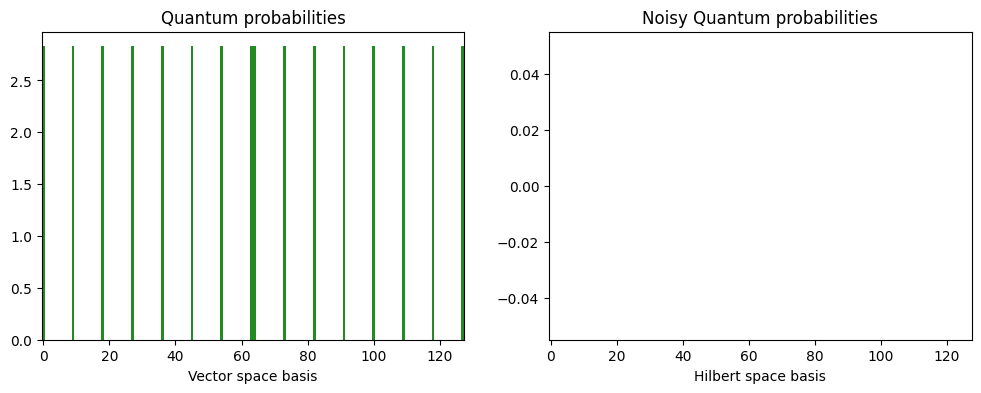

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(np.arange(len(classical_solution)), hhl_solution, color="forestgreen")
ax1.set_xlim(-0.5, len(classical_solution) - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Quantum probabilities")

ax2.bar(np.arange(len(hhl_solution)), hhl_solution_noise, color="limegreen")
ax2.set_xlim(-0.5, len(hhl_solution) - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Noisy Quantum probabilities")


plt.show()

# Comparison

Let's compare the two solutions with the Monte Carlo truth

In [ ]:
print("Classical solution: \t", discretized_classical_solution)
print("HHL solution: \t\t", discretized_hhl_solution)
print()
MC_truth = [ 1 if seg.hit_from.track_id == seg.hit_to.track_id else 0 for seg in ham.segments]
print("MC truth: \t\t",np.array(MC_truth))
print("Error in solution", np.mean(discretized_classical_solution - discretized_hhl_solution))

Classical solution: 	 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
HHL solution: 		 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]

MC truth: 		 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
Error in solution 0.0


In [ ]:
#print(np.dot(np.dot(discretized_hhl_solution.T , ham.Z) , discretized_hhl_solution))
#print(np.dot(discretized_hhl_solution.T , ham.Z))

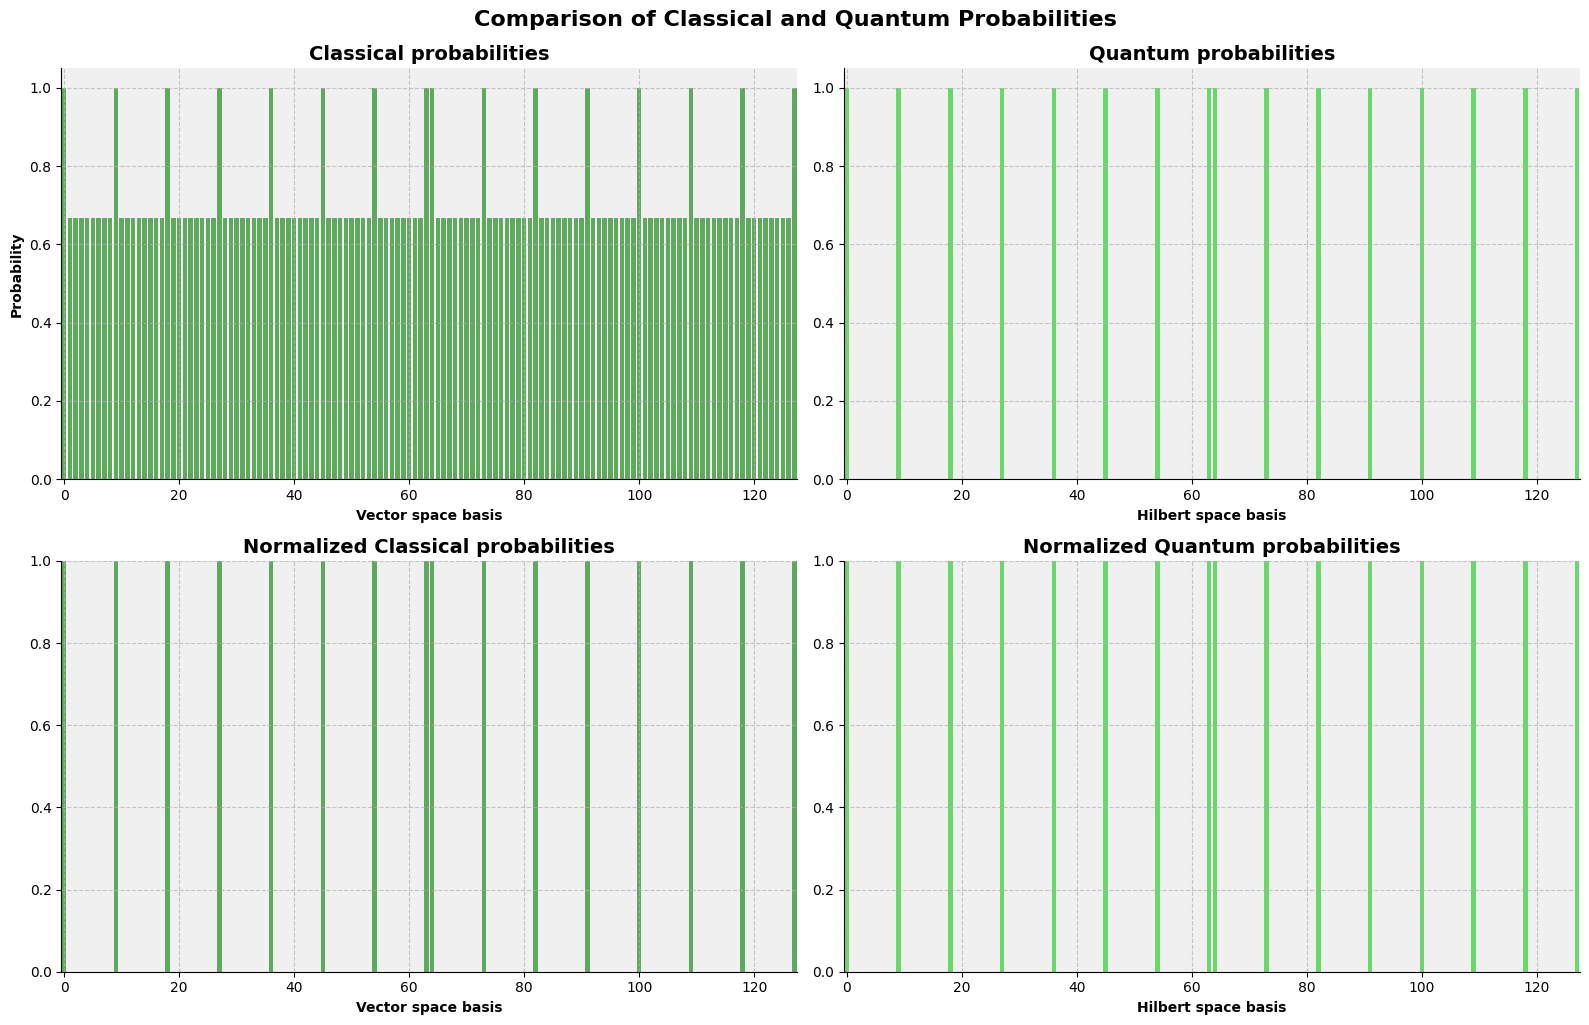

In [ ]:
def normalize_data(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Common styling
for ax in (ax1, ax2, ax3, ax4):
    ax.set_facecolor('#f0f0f0')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Original data plots
ax1.bar(np.arange(len(classical_solution)), classical_solution * 2, color="forestgreen", alpha=0.7)
ax1.set_xlim(-0.5, len(classical_solution) - 0.5)
ax1.set_xlabel("Vector space basis", fontweight='bold')
ax1.set_ylabel("Probability", fontweight='bold')
ax1.set_title("Classical probabilities", fontsize=14, fontweight='bold')

ax2.bar(np.arange(len(hhl_solution)), hhl_solution*(1/max(hhl_solution)), color="limegreen", alpha=0.7)
ax2.set_xlim(-0.5, len(hhl_solution) - 0.5)
ax2.set_xlabel("Hilbert space basis", fontweight='bold')
ax2.set_title("Quantum probabilities", fontsize=14, fontweight='bold')

# Normalized data plots
normalized_classical = normalize_data(classical_solution * 2)
ax3.bar(np.arange(len(normalized_classical)), normalized_classical, color="forestgreen", alpha=0.7)
ax3.set_xlim(-0.5, len(normalized_classical) - 0.5)
ax3.set_xlabel("Vector space basis", fontweight='bold')
ax3.set_title("Normalized Classical probabilities", fontsize=14, fontweight='bold')
ax3.set_ylim(0, 1)

normalized_quantum = normalize_data(hhl_solution*(1/max(hhl_solution)))
ax4.bar(np.arange(len(normalized_quantum)), normalized_quantum, color="limegreen", alpha=0.7)
ax4.set_xlim(-0.5, len(normalized_quantum) - 0.5)
ax4.set_xlabel("Hilbert space basis", fontweight='bold')
ax4.set_title("Normalized Quantum probabilities", fontsize=14, fontweight='bold')
ax4.set_ylim(0, 1)

plt.tight_layout()
fig.suptitle("Comparison of Classical and Quantum Probabilities", fontsize=16, fontweight='bold', y=1.02)
plt.show()

In [ ]:
print((hhl_solution*(1/max(hhl_solution))))

[ 1.00000000e+00  2.43548647e-15  2.35019838e-15  5.48360507e-16
  1.74135344e-15  4.43871015e-16  2.46743595e-16  4.59886086e-16
  2.82837319e-15  1.00000000e+00  2.85694008e-16  1.94585919e-15
  1.52822000e-16  9.15603191e-16  3.05082702e-16  2.07093076e-16
  2.65210242e-15  6.01005531e-16  1.00000000e+00  1.25157265e-15
  1.91166709e-16  2.45315975e-16  1.30801859e-15  3.39741535e-16
  1.20474386e-16  2.18438363e-15  1.19437164e-15  1.00000000e+00
  1.12436806e-16  3.24013000e-16  8.93241269e-17  4.95173889e-16
  1.84034136e-15  2.76129227e-16  3.11892826e-16  4.17817323e-16
  1.00000000e+00  2.25017706e-15  1.18193852e-15  5.00098291e-16
  3.04746522e-16  1.03281464e-15  3.21915672e-16  2.59265190e-16
  1.72230819e-15  1.00000000e+00  2.09611981e-16  8.23751929e-16
  2.01147213e-16  2.68281392e-16  1.44744409e-15  3.36592219e-16
  1.32680311e-15  3.75202671e-16  1.00000000e+00  1.77997660e-16
  2.65973105e-16  1.90394285e-16  6.31406621e-17  6.12376210e-16
  3.95161718e-16  7.80848

In [ ]:
from approx import approx
big_prob = 0
little_prob = 0
for i in (hhl_solution*(1/max(hhl_solution))):
    if approx(1, i, rel_tol=1e-2):
        big_prob += i
    else:
        little_prob += i
print(big_prob, little_prob)
print(big_prob/little_prob)

15.999999999999835 4.0327123964348836e-14
396755295868473.6


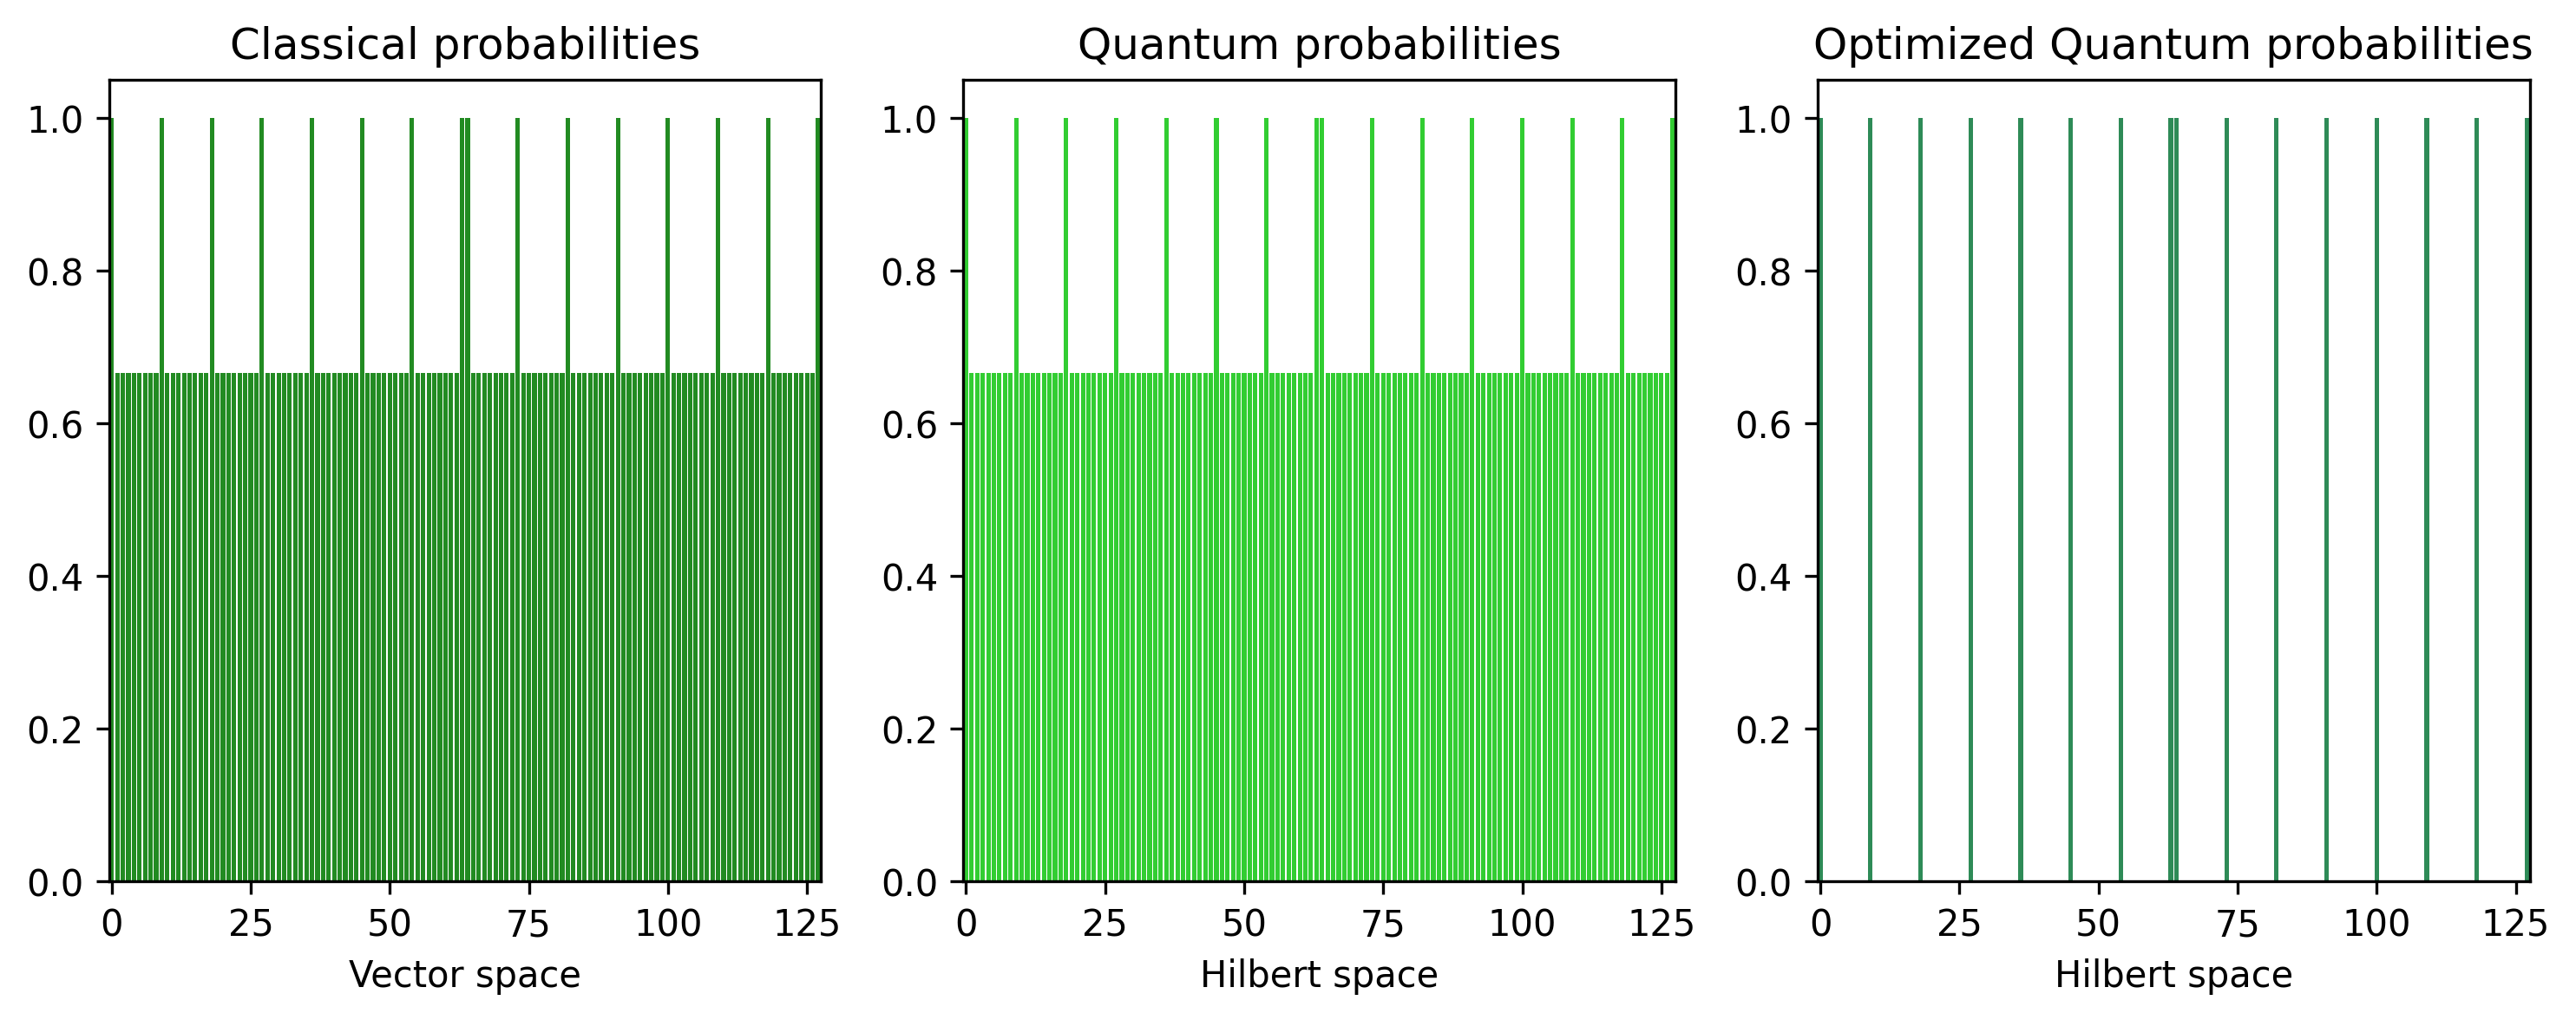

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), dpi=300)

ax1.bar(np.arange(len(classical_solution)), classical_solution * 2, color="forestgreen")
ax1.set_xlim(-0.5, len(classical_solution) - 0.5)
ax1.set_xlabel("Vector space")
ax1.set_title("Classical probabilities")

ax3.bar(np.arange(len(hhl_solution)), hhl_solution*(1/max(hhl_solution)), color="seagreen")
ax3.set_xlim(-0.5, len(hhl_solution) - 0.5)
ax3.set_xlabel("Hilbert space")
ax3.set_title("Optimized Quantum probabilities")

ax2.bar(np.arange(len(hhl_solution)), classical_solution*(1/max(classical_solution)), color="limegreen")
ax2.set_xlim(-0.5, len(hhl_solution) - 0.5)
ax2.set_xlabel("Hilbert space")
ax2.set_title("Quantum probabilities")

plt.show()

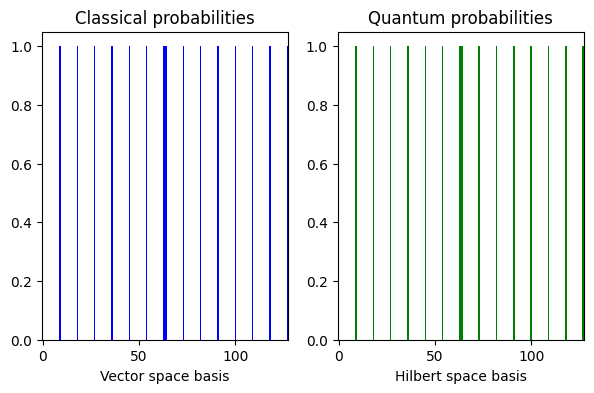

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))

ax1.bar(np.arange(len(discretized_classical_solution)), discretized_classical_solution, color="blue")
ax1.set_xlim(-0.5, len(discretized_classical_solution) - 0.5)
ax1.set_xlabel("Vector space basis")
ax1.set_title("Classical probabilities")

ax2.bar(np.arange(len(discretized_hhl_solution)), discretized_hhl_solution, color="green")
ax2.set_xlim(-0.5, len(discretized_hhl_solution) - 0.5)
ax2.set_xlabel("Hilbert space basis")
ax2.set_title("Quantum probabilities")

plt.show()

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

def suzuki_trotter_circuit(A, time, num_slices=1):
    """Generate Suzuki-Trotter approximation for time evolution.

    Args:
        A (np.ndarray): The unitary matrix to be evolved.
        time (float): Total evolution time.
        num_slices (int): Number of Trotter slices.

    Returns:
        QuantumCircuit: The Suzuki-Trotter approximation circuit.
    """
    num_qubits = int(np.log2(A.shape[0]))
    qr = QuantumRegister(num_qubits, name="q")
    circuit = QuantumCircuit(qr, name="SuzukiTrotter")

    hamiltonian = -1j * A * time / num_slices

    for _ in range(num_slices):
        for i in range(num_qubits):
            theta, phi, lam = np.angle(hamiltonian[i, i]), -np.angle(hamiltonian[i, (i + 1) % num_qubits]), -np.angle(hamiltonian[i, (i - 1) % num_qubits])
            circuit.u(theta, phi, lam, qr[i])

    return circuit

# Example usage:
A_matrix = ham.A.todense() # Replace this with your actual unitary matrix
total_time = 1.0
slices = 4

suzuki_trotter_circ = suzuki_trotter_circuit(A_matrix, total_time, num_slices=slices)
print(suzuki_trotter_circ)


     ┌─────────────┐┌─────────────┐┌─────────────┐┌─────────────┐
q_0: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_1: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_2: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_3: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_4: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_5: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     ├─────────────┤├─────────────┤├─────────────┤├─────────────┤
q_6: ┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├┤ U(-π/2,0,0) ├
     └─────────────┘└─────────────┘└─────────────┘└─────────────┘


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np
import scipy.sparse as sp

def suzuki_trotter_circuit_sparse(A, time, num_slices=1):
    """Generate Suzuki-Trotter approximation for time evolution.

    Args:
        A (Union[np.ndarray, sp.csc_matrix]): The unitary matrix to be evolved.
        time (float): Total evolution time.
        num_slices (int): Number of Trotter slices.

    Returns:
        QuantumCircuit: The Suzuki-Trotter approximation circuit.
    """
    num_qubits = int(np.log2(A.shape[0]))
    qr = QuantumRegister(num_qubits, name="q")
    circuit = QuantumCircuit(qr, name="SuzukiTrotter")

    if sp.issparse(A):
        rows, cols = A.nonzero()
        for row, col in zip(rows, cols):
            hamiltonian_element = -1j * A[row, col] * time / num_slices
            for _ in range(num_slices):
                theta, phi, lam = np.angle(hamiltonian_element), -np.angle(hamiltonian_element), -np.angle(hamiltonian_element)
                circuit.u(theta, phi, lam, qr[row - 1])  # Subtract 1 from row to get correct qubit index

    return circuit

# Example usage with sparse matrix:
sparse_A_matrix = sp.csc_matrix(ham.A.todense())
total_time = 1.0
slices = 4
suzuki_trotter_circ_sparse = suzuki_trotter_circuit_sparse(sparse_A_matrix, total_time, num_slices=slices)
print(suzuki_trotter_circ_sparse)


IndexError: list index out of range